In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_soc_dos():
    with open('DOSCAR','r') as f:
        line = f.readline()
        Number_of_Ions = int(line.split()[0])
        if_PDOS = True if int(line.split()[2])==1 else False
        for i in range(4):
            f.readline()
        infor_line = f.readline().split()
        NDOS = int(infor_line[2])
        Fermi_Energy = float(infor_line[3])

        print('Fermi_energy: ',Fermi_Energy)
        print('NDOS:         ',NDOS)
        total_dos = []
        for i in range(NDOS):
            line = f.readline().split()
            total_dos.append(line)

        total_dos = np.array(total_dos).astype(float)
        # 减去 费米能
        total_dos[:,0] = total_dos[:,0] - Fermi_Energy
    return total_dos
        

In [3]:
def get_atom_dos(index=1):
    with open('DOSCAR','r') as f:
        for i in range(5):
            f.readline()
        infor_line = f.readline().split()
        NDOS = int(infor_line[2])
        Fermi_Energy = float(infor_line[3])
        line_number = NDOS+(index-1)*(NDOS+1)+1
        for i in range(line_number):
            f.readline()
            
        atom_dos = []
        for i in range(NDOS):
            line = f.readline().split()
            atom_dos.append(line)

        atom_dos = np.array(atom_dos).astype(float)
        # 减去 费米能
        atom_dos[:,0] = atom_dos[:,0] - Fermi_Energy
    return atom_dos

In [71]:
def draw_total_dos(dos_data):
    plt.plot(dos_data[:,0],dos_data[:,1],label='total')
    plt.legend()
    plt.xlabel('energy')
    plt.ylabel('DOS')
    plt.xlim(-20,20)
    plt.ylim(0,2.5)

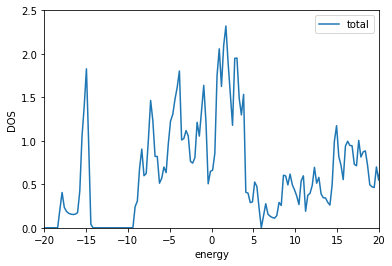

In [72]:
draw_total_dos(totol_dos)

In [15]:
def draw_pdos(dos_data):
    label_list = 's  p_y p_z p_x d_{xy} d_{yz} d_{z2-r2} d_{xz} d_{x2-y2}'.split()
    fig, axes = plt.subplots(
        nrows=3, ncols=3, sharex=True, sharey=True, figsize = (12,12)
    )

    for i in range(9):
        b = i%3
        a = i//3
        ax = axes[a,b]
        ax.plot(dos_data[:,0],dos_data[:,1+i*4],label=label_list[i])
        plt.xlim(-20,20)
        plt.ylim(0,1)
        ax.legend()

In [61]:
def draw_pdos_direction_up_down(dos_data,direction='z',orbital='d_{xz}'):
    orbital_list = 's  p_y p_z p_x d_{xy} d_{yz} d_{z2-r2} d_{xz} d_{x2-y2}'.split()
    spin_list = 'up down'.split()
    direction_list = 'x y z'.split()
    orbital_index = orbital_list.index(orbital)
    direction_index = direction_list.index(direction)
    
    total_dos = dos_data[:,orbital_index*4+1]
    orbital_position = orbital_index*4+direction_index+2
    orbital_dos = dos_data[:,orbital_position]
    energy = dos_data[:,0]
    up = (total_dos+orbital_dos)/2
    down = (total_dos-orbital_dos)/2
    
    fig,ax = plt.subplots()
    plt.ylabel('Energy')
    plt.xlabel('DOS')
    plt.plot(energy,up,label=orbital+'_'+direction+'_up')
    plt.plot(energy,-down,label=orbital+'_'+direction+'_down')
    plt.xlim(-20,20)
    plt.ylim(-0.5,0.5)
    
    plt.legend()
    plt.savefig(orbital+'_'+direction+'.png',dpi=100)
    plt.close()
#     ax.plot(energy,down)    
    
    
    

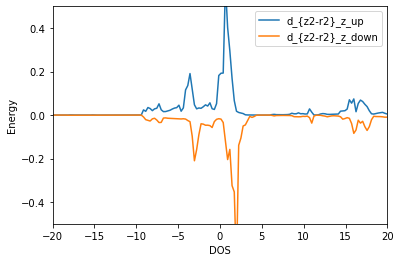

In [63]:
draw_pdos_direction_up_down(Cr_dos,direction='z',orbital='d_{z2-r2}')

In [16]:
totol_dos = get_soc_dos()
Cr_dos = get_atom_dos()

Fermi_energy:  9.33718774
NDOS:          2501


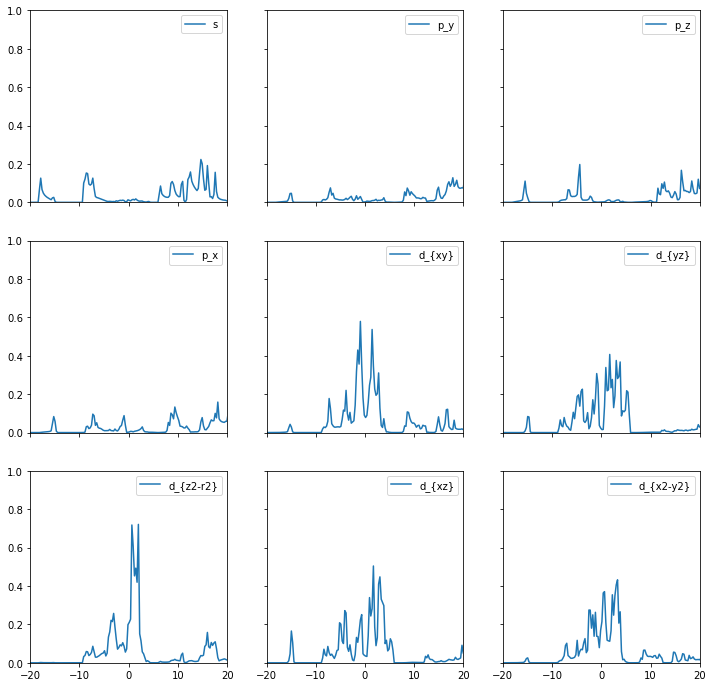

In [17]:
draw_pdos(Cr_dos)

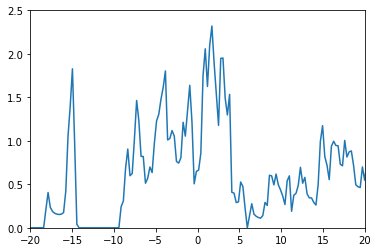

In [22]:
draw_total_dos(totol_dos)